# Introduction

**Machine Learning Algorithm:**
* Data Preprocessing

* Supervised:
    1. Linear Regression
        * Simple Linear Regression
        * Multiple Linear Regression
    2. Logistic Regression
    3. Decision Tree(CART)
    4. Random Forest
    4. Naive Bayes
    5. SVM(Linear)
    6. KNN


* UnSupervrised
   1. K-Means
   2. Principal Component Analysis
   3. Apriori Algorithm

### Other Machine Learning Techniques
   1. Natural Language Processing (NLP)
   2. Artificial Neural Networks
   3. Convolutional Neural Networks

# :--Data Preprocessing

In [ ]:
#importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#loading Dataset
dataset = pd.read_csv("../input/machine-learning-datasets/Data.csv")

In [ ]:
dataset.head()

This data contains information of customers of some company
In this data Country, Age and Salary are independent variables and Purchased is dependent variable.

But there are some missing data. Age column for Spain and Salary column for Germany.
The most common idea to solve this problem is to take mean of the columns.


In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,3].values

Here X represents the independent varible (All columns except the last one) and y represents dependent variable (last column)

In [ ]:
X

In [ ]:
y

In [ ]:
#Calculating mean to fill missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:,1:3] = imputer.transform(X[:,1:3])

In [ ]:
X

Now you can see that the missing data is filled with the mean of the column

### Encoding categorical data for Country Column

Initially, the Country column contain countries written as text.
There are 2 categorical variable (Country and Purchased)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
labelencoder_X.fit_transform(X[:,0])

The Countries are no longer written as text. Now we have the encoded values of this country.

In [ ]:
X[:,0] = labelencoder_X.fit_transform(X[:,0])

In [ ]:
X

The conversion of text to numberis done because Machine Learning is based on Mathematical equations and we can put these numbers in that equation. But this also comes with a drawback. The equations in Machine Learning model will think that Spain > Germany > France. But there is no relational order between the 3 countries.

So we have to prevent the Machine Learning equations from thinking that there is a relational order between the countries.

To prevent this we have to use dummy varibales.


In [ ]:
#Creating dummy variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])],     remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)

In [ ]:
X

Now the 1st column Country is replaced by 3 columns. 1st, 2nd and 3rd columns represent France, Germany and Spain respectively.

In [ ]:
#Encoding categorical data for Purchased Column

y

In [ ]:
labelencoder_y = LabelEncoder()
labelencoder_y.fit_transform(y)

In [ ]:
y = labelencoder_y.fit_transform(y)

In [ ]:
y

* Note : Purchased column is encoded: 0 - No and 1 - Yes

## Splitting the Dataset into the Training set and Test set

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,3].values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:,1:3] = imputer.transform(X[:,1:3])

In [ ]:
# Encoding categorical data for coulmns

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])],     remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

* Splitting the Dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [ ]:
X_train, X_test

In [ ]:
y_train, y_test

**Note : This will be used as to establish a relation between independent and dependent variables. Morever, used to predict accuracy of the model.**

## Feature Scaling

Here the dataset have Age and Salary columns. A lot of machine learning models are based on Euclidean distance because of which after computing the square difference of Salary will dominate square difference Age.
That's why we need feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X_train, X_test

* Now you can see that the values have been scaled

# :--Supervised Machine Learning

### Supervised
**Supervised learning is when the model is getting trained on a labelled dataset. Labelled dataset is one which have both input and output parameters. In this type of learning both training and validation datasets are labelled.**

#  -> 1. Linear Regression

**In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression.**

## a)Simple Linear Regression

Simple linear regression is a parametric test, meaning that it makes certain assumptions about the data. These assumptions are: Homogeneity of variance (homoscedasticity): the size of the error in our prediction doesn’t change significantly across the values of the independent variable.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv("../input/machine-learning-datasets/Salary_Data.csv") 
dataset.head()

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/3, random_state = 0)

In [ ]:
# FITTING Simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

In [ ]:
#predicting the test results
y_pred = regressor.predict(X_test)
y_pred

In [ ]:
#comparing test values with predicting values
y_test

In [ ]:
#visualizing the traning set results
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "blue")
plt.title("Salary vs Experience (Training Set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

In [ ]:
#visualizing the test set results
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "blue")
plt.title("Salary vs Experience (Training Set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

In [ ]:
#checking Accuracy
accuracy = regressor.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

## b)Multiple Linear Regression

Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of multiple linear regression is to model the linear relationship between the explanatory (independent) variables and response (dependent) variables.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv("../input/machine-learning-datasets/50_Startups.csv")

In [ ]:
dataset.tail()

In [ ]:
#to remove warnings from our code
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values

In [ ]:
X,y

In [ ]:
#Creating dummy variables for state columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [3])],     remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)

In [ ]:
X

In [ ]:
#Avoiding Dummy Variable trap
X = X[:, 1:]

In [ ]:
#spliting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [ ]:
X_train, y_train

In [ ]:
#fitting Multiple Linear Regression to the training set 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

In [ ]:
# predicting the results
y_pred = regressor.predict(X_test)
y_pred

In [ ]:
#compare results with test data
y_test

In [ ]:
#checking the accuracy
accuracy = regressor.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

#  -> 2.Polynomial Regression

In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an n th degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E (y | x).

In [ ]:
#Loading Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv("../input/machine-learning-datasets/Position_Salaries.csv")

In [ ]:
dataset.head(10)

In [ ]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

In [ ]:
plt.scatter(X,y)
plt.title("Position VS Salary")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

We don't have enough information to split the data into Train and Test data.


In [ ]:
#Fitting Linear Regression Mdoel :
### Just to compare its accuracy with Polynomial Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

In [ ]:
plt.scatter(X, y, color = "red")
plt.plot(X, lin_reg.predict(X), color = "blue")
plt.title("Linear Regression - Position VS Salary")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

In [ ]:
lin_reg.predict([[6.5]])

In [ ]:
accuracy = lin_reg.score(X,y)
print('Accuracy of the model is',accuracy*100,'%')

In [ ]:
#As you can see the accuracy is very low
#Fitting Polynomial Regression Model

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

In [ ]:
#Change the degree to get better accuracy
X_poly

In [ ]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

In [ ]:
plt.scatter(X, y, color = "red")
plt.plot(X ,lin_reg2.predict(poly_reg.fit_transform(X)), color = "blue")
plt.title("Polynomial Regression - Position VS Salary")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

In [ ]:
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

In [ ]:
accuracy = lin_reg2.score(poly_reg.fit_transform(X),y)
print('Accuracy of the model is',accuracy*100,'%')

### Note : The accuracy is better than that of Linear Regression

# -> 3. Logistic Regression

**Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression**

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#reading dataset
dataset = pd.read_csv("../input/machine-learning-datasets/Social_Network_Ads.csv")
dataset

In [ ]:
#data pre-processing
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.title('Visualisation of X')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#fitting Logistic regression to training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

In [ ]:
#checking predicted values
y_test

In [ ]:
#error Calculation
c = 0
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        c+=1
print("Incorrect classification in predicting test cases : ", c,"/",len(y_test))

In [ ]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
#visulizing the training data
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
#visualizing test data
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
#model accuracy
accuracy = classifier.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

# -> 4. Decision Tree

**A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).**

## Decision Tree Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
dataset = pd.read_csv("../input/machine-learning-datasets/Position_Salaries.csv")
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X,y)
y_pred = regressor.predict([[6.5]])
X_grid = np.arange(min(X), max(X), 0.001)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = "red")
plt.plot(X_grid ,regressor.predict(X_grid), color = "blue")
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [ ]:
y_pred

In [ ]:
# Accuracy
accuracy = regressor.score(X,y)
print('Accuracy of the model is',accuracy*100,'%')

## Decision Tree Classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv("../input/machine-learning-datasets/Social_Network_Ads.csv")

X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


#Create your Classifier here
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [ ]:
#model Accuracy
accuracy = classifier.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

# -> 5. Random Forest

**Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.Random decision forests correct for decision trees' habit of overfitting to their training set.**

## Random Forest Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
dataset = pd.read_csv("../input/machine-learning-datasets/Position_Salaries.csv")
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X,y)
y_pred = regressor.predict([[6.5]])
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = "red")
plt.plot(X_grid ,regressor.predict(X_grid), color = "blue")
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [ ]:
#predicited Results
y_pred

In [ ]:
#Model Accuracy
accuracy = regressor.score(X,y)
print('Accuracy of the model is',accuracy*100,'%')

## Random Forest Classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv("../input/machine-learning-datasets/Social_Network_Ads.csv")

X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Create your Classifier here
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [ ]:
#model Accuracy
accuracy = classifier.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

# -> 6. Naive Bayes

**In machine learning, naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. They are among the simplest Bayesian network models.But they could be coupled with Kernel density estimation and achieve higher accuracy levels.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv("../input/machine-learning-datasets/Social_Network_Ads.csv")

X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Create your Classifier here
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('Naive Bayes Classification (Training set)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('Naive Bayes Classification (Test set)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [ ]:
#model Accuracy"
accuracy = classifier.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

# -> 7. SVM-Support Vector Machine

**In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv("../input/machine-learning-datasets/Social_Network_Ads.csv")

X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#taking linear kernel
#Create your Classifier here
from sklearn.svm import SVC
classifier = SVC(kernel="linear", random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred

In [ ]:
y_test

In [ ]:
#confusion Matix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('SVM Classification (Training set)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('SVM Classification (Test set)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [ ]:
#model accuracy
accuracy = classifier.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

In [ ]:
#taking Radial Basis Function
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf", random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('SVM Classification (Training set)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('SVM Classification (Test set)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [ ]:
#Model Accuracy
accuracy = classifier.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

# -> 8. K-Nearest Neighbors(K-NN)

**In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv("../input/machine-learning-datasets/Social_Network_Ads.csv")

X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [ ]:
#Predicted Results
y_pred

In [ ]:
#Testing data
y_test

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('KNN Classification (Training set)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('KNN Classification (Test set)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [ ]:
#Model Accuracy
accuracy = classifier.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

# :--Unsupervised Machine Learning

### Unsupervised

**Unsupervised learning is a machine learning technique, where you do not need to supervise the model. Unsupervised machine learning helps you to finds all kind of unknown patterns in data. Clustering and Association are two types of Unsupervised learning.**

# -> 1. K-Means Clustering

**k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition and observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. It is popular for cluster analysis in data mining. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, Better Euclidean solutions can be found using k-medians and k-medoids.**
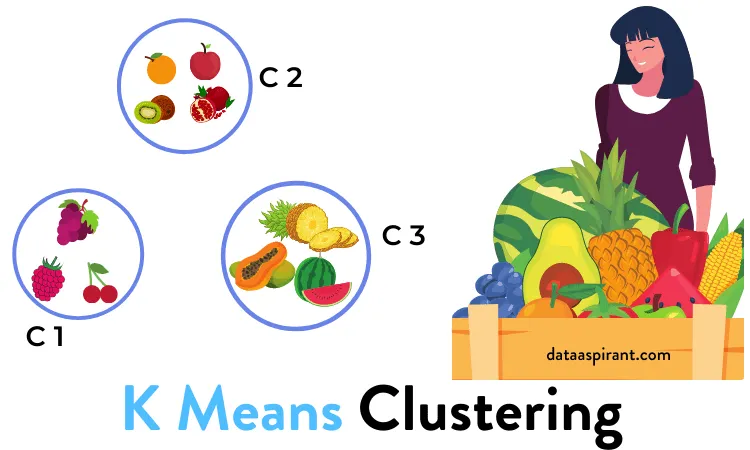

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#data Read
dataset = pd.read_csv('../input/machine-learning-datasets/Mall_Customers.csv')
dataset

In [ ]:
X = dataset.iloc[:,[3,4]].values

In [ ]:
#Using Elbow Method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see the elbow is at 5. So the optimal number of clusters is 5.

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

In [ ]:
#This shows the specific number of clusters from 0 to 4
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c='yellow', label = 'Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### By observing the above graph, we can see that:
* Cluster 1 - High Income, Low Spending Score - CAREFUL
* Cluster 2 - Average Income, Average Spending Score - STANDARD
* Cluster 3 - High Income, High Spending Score - TARGET
* Cluster 4 - Low Income, High Spending Score - CARELESS
* Cluster 5 - Low Income, Low Spending Score - SENSIBLE

In [ ]:
#Now we update the labels for better interpretation
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Carefull')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c='yellow', label = 'Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# -> 2. Hierarchical Clustering

**Hierarchical clustering is separating data into groups based on some measure of similarity, finding a way to measure how they’re alike and different, and further narrowing down the data. Let's consider that we have a set of cars and we want to group similar ones together. Look at the image shown below:**
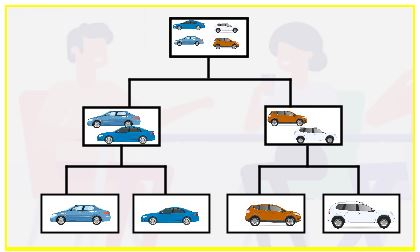

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#data read
dataset = pd.read_csv('../input/machine-learning-datasets/Mall_Customers.csv')
dataset

In [ ]:
X = dataset.iloc[:, [3,4]].values

In [ ]:
#Using the dendrogram to find optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [ ]:
#By observing the dendrogram, the optimal number of clusters are 5.
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc

In [ ]:
#ploting clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Carefull')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# -> 3. Apriori Algorithm

**Apriori is an algorithm used for Association Rule Mining. It searches for a series of frequent sets of items in the datasets. It builds on associations and correlations between the itemsets. It is the algorithm behind “You may also like” where you commonly saw in recommendation platforms. What is Associate Rule Mining?**

**ARM( Associate Rule Mining) is one of the important techniques in data science. In ARM, the frequency of patterns and associations in the dataset is identified among the item sets then used to predict the next relevant item in the set. This ARM technique is mostly used in business decisions according to customer purchases.**

**Example: In Walmart, if Ashok buys Milk and Bread, the chances of him buying Butter are predicted by the Associate Rule Mining technique.**

**Some definitions need to be remembered**

**Before we start, go through some terms which are explained below.**

**SUPPORT_COUNT — number of transactions in which the itemset appears.**

**MINIMUM_SUPPORT_COUNT — the minimum frequency of itemset in the dataset.**

**CANDIDATE_SET — C(k) support_count of each item in the dataset.**

**ITEM_SET — L(k) comparing each item in the candidate_set support count to minimum_support_count and filtering the under frequent itemset.**

**SUPPORT — the percentage of transactions in the database follow the rule.**

**Support(A->B) = Support_count(A U B)**

**CONFIDENCE — the percentage of customers who bought A also bought B.**

**Confidence(A->B) = [Support_count(AUB)/Support_count(A)]*100**

**Steps In Apriori**

**Apriori algorithm is a sequence of steps to be followed to find the most frequent itemset in the given database. This data mining technique follows the join and the prune steps iteratively until the most frequent itemset is achieved. A minimum support threshold is given in the problem or it is assumed by the user.**
1. In the first iteration of the algorithm, each item is taken as a 1-itemsets candidate. The algorithm will count the occurrences of each item.**

2. Let there be some minimum support, min_sup ( eg 2). The set of 1 – itemsets whose occurrence is satisfying the min sup are determined. Only those candidates which count more than or equal to min_sup, are taken ahead for the next iteration and the others are pruned.

3. Next, 2-itemset frequent items with min_sup are discovered. For this in the join step, the 2-itemset is generated by forming a group of 2 by combining items with itself.

4. The 2-itemset candidates are pruned using min-sup threshold value. Now the table will have 2 –itemsets with min-sup only.

5. The next iteration will form 3 –itemsets using join and prune step. This iteration will follow antimonotone property where the subsets of 3-itemsets, that is the 2 –itemset subsets of each group fall in min_sup. If all 2-itemset subsets are frequent then the superset will be frequent otherwise it is pruned.

6. Next step will follow making 4-itemset by joining 3-itemset with itself and pruning if its subset does not meet the min_sup criteria. The algorithm is stopped when the most frequent itemset is achieved.**

In [ ]:
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for ploting frequency distribution chart
from efficient_apriori import apriori # for association analysis
import sys

In [ ]:
# Ingest the data
df = pd.read_csv('../input/machine-learning-datasets/Market_Basket_Optimisation.csv', encoding='utf-8', header=None)
# Show dataframe
df

In [ ]:
# Put all transactions into a single list
txns=df.values.reshape(-1).tolist()

# Create a dataframe using this single list and add a column for count
df_list=pd.DataFrame(txns)
df_list['Count']=1

# Group by items and rename columns
df_list=df_list.groupby(by=[0], as_index=False).count().sort_values(by=['Count'], ascending=True) # count
df_list['Percentage'] = (df_list['Count'] / df_list['Count'].sum()) # percentage
df_list=df_list.rename(columns={0 : 'Item'})

# Show dataframe
df_list

In [ ]:
# Draw a horizontal bar chart
plt.figure(figsize=(16,20), dpi=300)
plt.ylabel('Item Name')
plt.xlabel('Count')
plt.barh(df_list['Item'], width=df_list['Count'], color='black', height=0.8)
plt.margins(0.01)   
plt.show()

In [ ]:
#running Apriori Algo
# Create a list of lists from a dataframe
txns2=df.stack().groupby(level=0).apply(list).tolist()
# Show what it looks like
txns2

In [ ]:
itemsets, rules = apriori(txns2, min_support=0.03, min_confidence=0.2, verbosity=1)

In [ ]:
itemsets

In [ ]:
#print the association rules found by the algorithm
for item in sorted(rules, key=lambda item: (item.lift,item.conviction), reverse=True):
    print(item)

**Conclusions**

Apriori is a straightforward algorithm that quickly learns association rules between items (data points). While I have taken you through its use for market basket analysis, there are also many other practical applications, including bioinformatics (protein sequencing), medical diagnosis (relationship between symptoms and disease), or Census data analysis.

One thing to be careful about when using Apriori on large datasets is the choice of minimum support threshold. If you are not careful, you can quickly run out of memory with a potentially huge number of itemsets of size 2.

# :- Other Machine Learning Techniques

# -> 1. Natural Language Processing (NLP)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#read data
dataset = pd.read_csv('../input/machine-learning-datasets/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
dataset

In [ ]:
#cleaning the text
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[:5]

In [ ]:
dataset['Review'][:5].values

In [ ]:
#creating a bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

In [ ]:
X

In [ ]:
y

 **Classification model - Naive Bayes**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

#Create your Classifier here
from sklearn.naive_bayes import GaussianNB
classifier1 = GaussianNB()
classifier1.fit(X_train, y_train)

y_pred = classifier1.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Model Accuracy 
accuracy = classifier1.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

**Classification model - Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier2.fit(X_train, y_train)


y_pred = classifier2.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#Model Accuracy
accuracy = classifier2.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

**Classification model - Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
classifier3.fit(X_train,y_train)

y_pred = classifier3.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#Model Accuracy
accuracy = classifier3.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

**Classification model - SVM**

In [ ]:
from sklearn.svm import SVC
classifier4 = SVC(kernel="linear", random_state=0)
classifier4.fit(X_train, y_train)

y_pred = classifier4.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#Model Accuracy
accuracy = classifier4.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

**Classification model - KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier5 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifier5.fit(X_train, y_train)

y_pred = classifier5.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = classifier5.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

**Classification model - Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier6 = LogisticRegression(random_state = 0)
classifier6.fit(X_train,y_train)

y_pred = classifier6.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Model Accuracy 
accuracy = classifier6.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

**So the best algorithm out of all the implemented is Naive Bayes**

# ->  2. Artificial Neural Networks

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
dataset = pd.read_csv("../input/machine-learning-datasets/Churn_Modelling.csv")
dataset

In [ ]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:,13].values

In [ ]:
X,y

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
X[:,1] = labelencoder_X_1.fit_transform(X[:,1])
labelencoder_X_2 = LabelEncoder()
X[:,2] = labelencoder_X_2.fit_transform(X[:,2])

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)
X = X.astype(np.float64)
X = X[:, 1:]

In [ ]:
X, y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#initialising the ANN
classifier = Sequential()

In [ ]:
#adding input layer and the first hidden layer
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))#second
classifier.add(Dense(units = 1,activation = 'sigmoid'))#output layer

In [ ]:
#compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#fit the ANN to training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

observing the accuracies above, we can see that the final accuracy will be around 86%

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
#model Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of the model is',accuracy_score(y_test, y_pred)*100,'%')

# ->   3. Convolutional Neural Networks

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [ ]:
#Initialising CNN
classifier = Sequential()

In [ ]:
#Step 1 - Convolution
classifier.add(Convolution2D(filters = 32,kernel_size = (3, 3), 
                      input_shape = (64, 64, 3), activation = "relu"))
#Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Convolution2D(filters = 32,kernel_size = (3, 3), activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2,2)))
#Step 3 - Flattening
classifier.add(Flatten())
#Step 4 - Full Connection
classifier.add(Dense(units = 128, activation = "relu"))
classifier.add(Dense(units = 1, activation = "sigmoid"))

In [ ]:
#Cmpiling the CNN
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

**Fitting the CNN to the images**

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_dataset = train_datagen.flow_from_directory('../input/cats-and-dogs-embedded-data/train',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

In [ ]:
testing_dataset = test_datagen.flow_from_directory('../input/cats-and-dogs-embedded-data/test',
                                                target_size=(64, 64),
                                                batch_size=32,
                                                class_mode='binary')

In [ ]:
classifier.fit(x = training_dataset, validation_data = testing_dataset, epochs = 50)

Output exceeds the size limit. Open the full output data in a text editor
```
Epoch 1/50
250/250 [==============================] - 31s 126ms/step - loss: 0.6816 - accuracy: 0.5651 - val_loss: 0.6950 - val_accuracy: 0.5530
Epoch 2/50
250/250 [==============================] - 25s 98ms/step - loss: 0.6130 - accuracy: 0.6620 - val_loss: 0.5499 - val_accuracy: 0.7300
Epoch 3/50
250/250 [==============================] - 25s 99ms/step - loss: 0.5508 - accuracy: 0.7201 - val_loss: 0.5328 - val_accuracy: 0.7265
Epoch 4/50
250/250 [==============================] - 25s 99ms/step - loss: 0.5373 - accuracy: 0.7286 - val_loss: 0.5239 - val_accuracy: 0.7445
Epoch 5/50
250/250 [==============================] - 25s 101ms/step - loss: 0.4952 - accuracy: 0.7569 - val_loss: 0.4979 - val_accuracy: 0.7655
Epoch 6/50
250/250 [==============================] - 26s 103ms/step - loss: 0.4817 - accuracy: 0.7669 - val_loss: 0.5393 - val_accuracy: 0.7320
Epoch 7/50
250/250 [==============================] - 26s 105ms/step - loss: 0.4694 - accuracy: 0.7764 - val_loss: 0.4648 - val_accuracy: 0.7910
Epoch 8/50
250/250 [==============================] - 26s 106ms/step - loss: 0.4508 - accuracy: 0.7881 - val_loss: 0.4696 - val_accuracy: 0.7820
Epoch 9/50
250/250 [==============================] - 28s 110ms/step - loss: 0.4308 - accuracy: 0.7981 - val_loss: 0.4713 - val_accuracy: 0.7960
Epoch 10/50
250/250 [==============================] - 28s 110ms/step - loss: 0.4278 - accuracy: 0.8065 - val_loss: 0.4778 - val_accuracy: 0.7815
Epoch 11/50
250/250 [==============================] - 28s 110ms/step - loss: 0.4016 - accuracy: 0.8150 - val_loss: 0.5068 - val_accuracy: 0.7735
Epoch 12/50
250/250 [==============================] - 27s 110ms/step - loss: 0.3882 - accuracy: 0.8216 - val_loss: 0.4830 - val_accuracy: 0.7960
Epoch 13/50
...
Epoch 49/50
250/250 [==============================] - 25s 99ms/step - loss: 0.0871 - accuracy: 0.9681 - val_loss: 0.8044 - val_accuracy: 0.8070
Epoch 50/50
250/250 [==============================] - 25s 98ms/step - loss: 0.0721 - accuracy: 0.9730 - val_loss: 0.8102 - val_accuracy: 0.8055
<tensorflow.python.keras.callbacks.History at 0x21c9e16b7f0>
```

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('../input/cats-and-dogs-embedded-data/test/germanshepherd.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_dataset.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
prediction

'dog'

* **If you find this helpful, I would really appreciate the upvote!**

* **If you see something wrong please let me know.**

* **And lastly Im happy to hear your thoughts about the notebook for me to also improve!**